In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("A").config("B","C").getOrCreate()

# 代码1：无分布式

np.vectorize函数是对np的向量的每个元素施加func的作用，有点像map

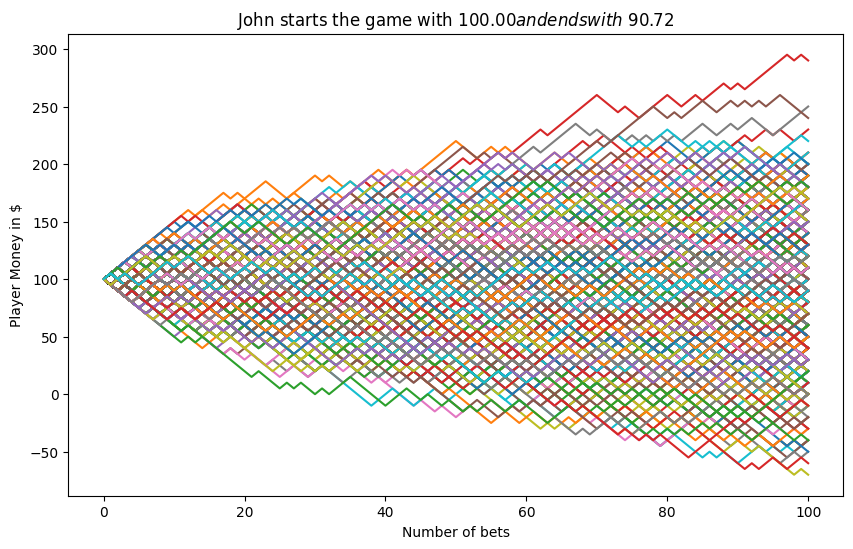

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

start_m = 100  # 初始钱
wager = 5  # 赌注
bets = 100  # 每次赌100局
trials = 1000  # 将上面这个赌一百局的实验1000次
trans = np.vectorize(lambda t: -wager if t <=
                     0.51 else wager)  # 输的概率为51%，输赢都是5块钱
# 返回一个向量化的函数对象，新对象的作用是对向量按位使用原函数
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
end_m = []  # 经过100局的赌博后剩下多少钱，进行1000次应该有1000次结果
for i in range(trials):
    money = reduce(lambda c, x: c + [c[-1] + x],
                   trans(np.random.random(bets)), [start_m])
    # money记录了每次trial中钱数的变化过程
    # reduce的第一个参数：是一个函数；第二个参数是每局得到或失去的钱数；第三个参数是初始值，相当于第零步的结果
    end_m.append(money[-1])
    plt.plot(money)

plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.title(("John starts the game with $ %.2f and ends with $ %.2f") %
          (start_m, sum(end_m)/len(end_m)))
plt.show()


### reduce：像scala中的foldLeft

第一个元是上一步的结果，第二个参数是本步新加入的值。

In [1]:
def my_add(a, b):
    result = a + b
    print(f"{a}+{b}={result}")
    return result


my_add(5, 5)


5+5=10


10

In [3]:
from functools import reduce

numbers = [0, 1, 2, 3, 4]
reduce(my_add, numbers, 100)  #迭代地加

#第一个元是上一步的结果，第二个参数是本步新加入的值。

100+0=100
100+1=101
101+2=103
103+3=106
106+4=110


110

### f=lambda c, x: c + [c[-1] + x]
reduce中第一个参数是二元的，第一个元是上一步的结果，第二个元是本步新加入的值。第二个元是从reduce的第二个参中按顺序抽出来的

c+[]是列表连接的意思，

In [12]:
import numpy as np

trans = np.vectorize(lambda t: -5 if t <= 0.51 else 5)
c = [100]
x = trans(np.random.random(100))  #返回一个100长的向量
c = c + [c[-1] + x[0]]
c = c + [c[-1] + x[1]]
c
#以此类推

[100, 95, 100]

In [15]:
money = reduce(lambda c, x: c + [c[-1] + x], trans(np.random.random(100)), [100])
money

[100,
 95,
 90,
 95,
 100,
 105,
 110,
 105,
 100,
 95,
 100,
 95,
 100,
 95,
 100,
 95,
 90,
 95,
 100,
 95,
 90,
 95,
 90,
 85,
 80,
 85,
 80,
 75,
 70,
 65,
 70,
 65,
 60,
 65,
 60,
 55,
 50,
 55,
 50,
 45,
 50,
 55,
 50,
 55,
 50,
 45,
 50,
 55,
 50,
 45,
 40,
 35,
 30,
 25,
 20,
 25,
 30,
 25,
 30,
 25,
 20,
 25,
 20,
 25,
 30,
 35,
 40,
 35,
 30,
 35,
 30,
 25,
 20,
 15,
 20,
 25,
 20,
 25,
 20,
 25,
 30,
 25,
 20,
 15,
 20,
 15,
 10,
 5,
 10,
 15,
 10,
 15,
 10,
 5,
 0,
 5,
 0,
 5,
 0,
 5,
 10]

### 一种新的简明的写法，不分布

92.85
51.386549796615064


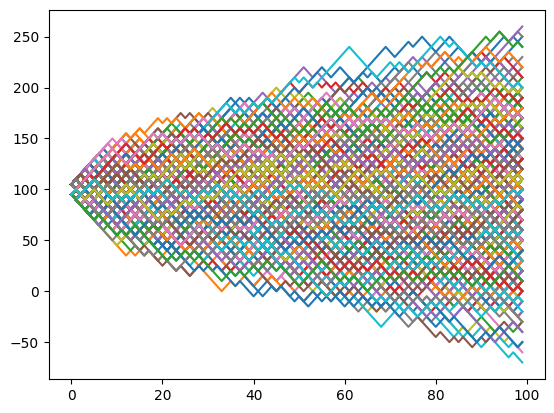

In [16]:
import numpy as np

bet = 100


def RandomVariable(prob):
    wager = 5 if prob <= 0.49 else -5
    return wager


RV = np.vectorize(RandomVariable)
import matplotlib.pyplot as plt

trials = 1000
end = []

for j in range(trials):
    sample = np.random.random(bet)
    money = RV(sample)  #一个一百长的向量
    money[0] = money[0] + 100  #给第一个值加一百
    for i in range(bet - 1):
        money[i + 1] = money[i] + money[i + 1] #相当于reduce
    end.append(money[-1])
    plt.plot(money)

end = np.array(end)
print(end.mean())
print(end.std())
plt.show()
